# Analysing Spike Data

In this  project, you will have to analyze spike data to determine if there are any differences in the firing rates of a neuron in two different conditions. You will have to calculate the frequency of spikes, plot the data, compute the interspike intervals, plot the histograms of the interspike intervals, compute the Fano factor, compute the autocorrelation of the increments, compute the autocorrelation of the interspike intervals, build a statistical model for the spike train, and evaluate the model. The project is taken from the book by Kramer [1].


# Introduction
----------------------------

Normally, the cells in your eye that respond to light focus on small parts of what you're seeing. But, even when they're grown outside of the eye and kept in the same light and conditions all the time, they still send out signals. In a healthy eye, this background activity is like a constant chatter, but it changes when you see something. Figuring out more about this background activity can help us understand how specific things affect these signals.

# Case Study Data

So, there's this researcher who's diving into the background activity of one of these cells. They reach out to you with their findings. They've been watching how often the cell sends out signals in _two situations_: with the lights dim or with the lights on bright. They want to team up with you to see if there's a difference in how much the cell fires in these situations and which setup is better for future experiments. They've been tracking this activity for 30 seconds in each situation.

# Goal

When you're diving into data, the first thing you do is usually just look at it and use some simple math to understand what's going on. For data that keeps changing over time we start by plotting each point against time. But when it comes to these signal spikes, it gets a bit trickier. There are different ways to talk about the same spike data. You could list the times when spikes happen, or you could talk about the time between spikes, or you could count spikes within certain time chunks. Learning how to handle and visualize all these different ways of representing spike data is the key to unlocking what's really going on in the data. That's what you'll have to do in this notebook.



[1] Kramer, Mark A., and Uri T. Eden. Case studies in neural data analysis: a guide for the practicing neuroscientist. MIT Press, 2016.


In [3]:
# Prepare the standard modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
# Load the data
data_dict = sio.loadmat('data_spikes.mat')
print(data_dict.keys())

dict_keys(['__header__', '__version__', '__globals__', 'SpikesLow', 'SpikesHigh'])


You should find two non-private variables in the data dictionary:

* __SpikesLow__: spike times over 30 s in the low ambient light condition,

* __SpikesHigh__: spike times over 30 s in the high ambient light condition.

We can take these two variables from data so that we can work with them directly.

In [6]:
spikes_high = data_dict['SpikesHigh'].flatten() #think: why do we use flatten here?
spikes_low = data_dict['SpikesLow'].flatten()

# Frequency of spikes
-----------------------------

`spikes_high` and `spikes_low` are arrays of spike times. We can calculate the frequency of spikes in each condition by dividing the number of spikes by the duration of the recording. We can then compare the two conditions. We know that the recording is 30-second-long, so we can calculate the frequency of spikes in each condition.

The _firing rate_ (which is the frequency of spikes) is the number of spikes divided by the duration of the recording and it is given by the formula:

$$
f := \frac{N}{T}
$$

where $f$ is the firing rate, $N$ is the number of spikes, and $T$ is the duration of the recording.


In [7]:
# Calculate the frequency of spikes in each condition


# Plotting the data

These calculations help us figure out one thing about the data: how often the neuron fires throughout the whole recording. Are there any big differences in firing between the two situations? Or is the change in firing rates just what we'd expect from random fluctuations? To answer these questions, we need statistical methods that work well with spike data. So, let's take a closer look at the data and see how the spikes are happening when the lights are dim. It might seem easy to just plot the `spikes_low` variable, but there's more to it.

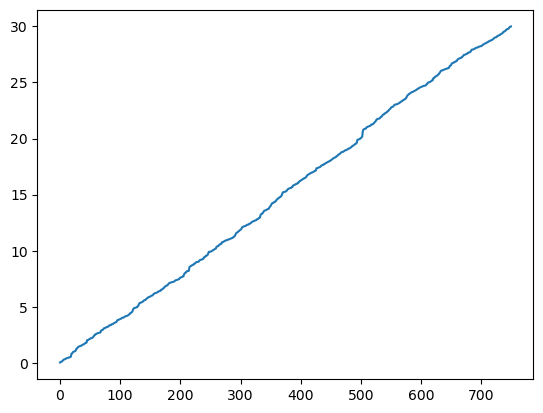

In [8]:
plt.plot(spikes_low)
plt.show()


We see that _this plot is not really helpful_. The $x$-axis is just the index of the spike in the array, and the $y$-axis is the time of the spike. This plot doesn't show us the time of the spikes in the recording. We need to plot the spikes against time. We can do this by creating a raster plot. In a raster plot, each dot represents a spike, and (the $y$-axis shows the time of the spike , while the) $x$-axis shows the time in the recording. We can create a raster plot for the `spikes_low` variable.

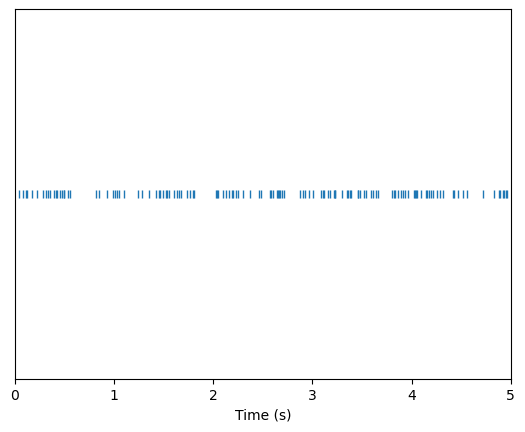

In [9]:
plt.plot(spikes_low, np.ones_like(spikes_low), '|')
plt.xlim([0, 5]) # we just plot the first 5 seconds
plt.xlabel('Time (s)')
plt.yticks([])
plt.show()

In [10]:
# Create a raster plot for the spikes_low and spikes_high variables (plotting just the first 5 seconds of each)


**Question**: we’ve plotted a 5 s interval of data that begins at time 0 s. Through visual inspection, do you find similar conclusions for other 5 s intervals chosen from the data?

# Interspike intervals (ISIs)
----------------------------

So far, we have examined the long-term structure of the spiking over multiple seconds. Let’s now focus on the _short-term_ structure that occurs within a single second or less. Instead of plotting 5 s of spike train data, let’s plot an interval of 1 s.


In [11]:
# Create a raster plot for the spikes_low and spikes_high variables (plotting just the first 1 second of each)

Inspecting smaller time intervals, you might notice bursts of spikes that cluster near each other in time, interspersed with longer periods that contain less spiking. These patterns of bursts and quiescence look different between the low- and high-light stimuli. Visual inspection is an important tool, but we would like a quantitative result. How might we compare this fine temporal structure in the two conditions?

One approach to further characterizing the differences in spiking between the two conditions is to transform the data. One of the most useful transformations focuses on the waiting times between the spikes, or _interspike intervals_ (ISIs), instead of the spike times themselves.

The ISIs are computed as the difference between consecutive spike times. For example, if the spike times are [0.1, 0.3, 0.5, 0.7, 0.9], then the ISIs are [0.2, 0.2, 0.2, 0.2].

In [12]:
# compute the ISIs for the spikes_low and spikes_high variables
# hint: use np.diff() function

# isi_low = ...
# isi_high = ...

**Question**: Consider the variables `isi_low` and `isi_high`. How do the sizes of these variables compare to the sizes of the corresponding spike trains? Hint: Given 𝑁 spikes, how many ISIs must occur?

### Plotting the ISIs

The variables `isi_low` and `isi_high` contain the interspike intervals for the low and high light conditions, respectively. Since they are vector we can plot them directly.

In [13]:
# plot the ISIs for the low and high light conditions

The x-axis is the vector index, which ranges from 1 to the length of the vector of ISI. The y-axis is the value of the ISI at each index. We see that the ISI values range from small times to large times. In this way, the visualization provides some insight into the ISI values for the low-light condition.

**Question**: What is the smallest ISI you expect to observe for a neuron? Would you be surprised to find an ISI of less than 1 second? of less than 1 millisecond? of less than 1 nanosecond?

## Histograms of ISIs

Plots of the ISI vectors provide some information about the data (e.g., the approximate range of the ISI values), but there’s more insight to be gained. To that end, let’s now implement another approach to visualizing these types of data: the _histogram_.

The idea of a histogram is to count the number of occurrences of each value in the data. In this case, we count the number of times we observe an ISI value in different bins of time. Let’s define the time bins for the histogram. Inspection of the ISI data for the low-light condition reveals values that range from near 0 s to over 0.4 s. Therefore, we choose the following time bins:

Bin 0 [0.00 0.01]

Bin 1 [0.01 0.02]

Bin 2 [0.02 0.03]

Bin 3 [0.03 0.04]

Bin 4 [0.04 0.05]

Bin 5 [0.05 0.06]

Bin 6 [0.06 0.07]

…

Bin N [0.49 0.50]

The bins begin at time 0 s and end at time 0.5 s, with a bin size of 0.01 s. The purpose of the histogram is to count the number of times the data values fall into each bin. Notice that we’ve chosen the range of bins to extend beyond the observed range of data; that’s fine, and we expect to count no values in the bins near 0.5 s.

In [14]:
# plot the histogram of ISIs for the low and high light conditions

Of course, we’re free to choose any interval of bins for the histogram. In the preceding examples, we chose a bin size of 0.01 s = 10 ms. Based on our understanding of a neuron, we might instead choose to examine a smaller bin size, 0.001 s = 1 ms. This choice would provide a more detailed view of the data, but it would also require more bins. The choice of bin size is a trade-off between the level of detail in the visualization and the ease of interpretation.

In [15]:
# plot the histogram of ISIs for the low and high light conditions with a bin size of 1 ms

**Question**:  Describe the features of the two histograms. What features of the ISI distributions are similar for the two conditions? What features are most strikingly different?

**Question**:  What does the ISI distribution reveal about the spiking activity in the low-light condition? From this ISI distribution, could you sketch a spike train consistent with these data? And what about the high-light condition?

## Examining Binned Spike Increments

Another common approach to analyzing spiking data is to discretize time into bins of fixed width and count the number of events that occur in each time bin. The sequence of spike counts across all the bins is sometimes called the _increment process_ for the spike train. When the time bins are sufficiently small, say, 1 ms for typical spike train data, the resulting increment process is just a sequence of zeros and ones. In this case, the time bins are so small that the probability of more than one spike occurring in each bin is zero or negligibly small.

Each tiny time bin then contains a spike (and we assign that bin a value of 1) or does not (and we assign that bin a value of 0). This idea of representing the spike train as a sequence of zeros and ones for small bin increments will be important when we build statistical models of the spike.

For now, let's pick a larger bin size of 50 ms and count the number of spikes in each bin. We can then plot the spike counts for the low and high light conditions.

In [18]:
# Let’s bin the spike train data of the into time bins of size 50 m
time_bins = np.arange(0, 30, 0.05)                       # Define the time bins
IncrementsLow50, _ = np.histogram(spikes_low, time_bins)  # ... and compute a histogram of the data

# Plot the resulting counts over time

# Do the same for the high light condition

**Question**: What can you say about the spike train data based on the increment process that we just plotted? Approximately how often do you observe a 50 ms increment with zero spikes? With four spikes?

# Fano Factor
------------------------------

One question that arises quite often is how variable these binned counts are. To illustrate this variability, let’s consider two scenarios. In the first, consider a neuron that fires perfectly regularly, like a metronome. In this case, we expect the number of spikes in each time bin to be nearly identical. On the other hand, consider the scenario of a neuron that fires in irregular bursts. In this case, we expect much more variability in the number of spikes in each time bin, depending on whether a time bin contained a burst of spikes or a quiet period. To characterize this variability, a standard measure to compute is the sample Fano factor (FF). It’s easy to define the Fano factor: FF is the sample variance of the increment process divided by the sample mean of the increment process.

The FF formula is given by:

$$
FF = \frac{\text{Var}(X)}{\text{Mean}(X)}
$$

where $\text{Var}(X)$ is the variance of the increment process and $\text{Mean}(X)$ is the mean of the increment process.

In [ ]:
# Compute the Fano factor for the low and high light conditions

## Interpreting the FF

To interpret the Fano Factor, we need to introduce the concept of a _Poisson process_. A Poisson process is a model for a spiking process for which each spike occurrence is independent of every other spike occurrence. In other words, the probability of a neuron spiking at any instant does not depend on when the neuron fired (or did not fire) previously. A useful way to conceptualize this process is as a coin flip. For example, consider the following outcome of 20 coin flips:

HTHTTTHTTTTTHHHHHHTH

where H indicates heads, and T indicates tails.

Based on your intuitive knowledge of a coin flip, does the result of a chosen coin flip depend on any other coin flip?

The answer is clearly no. Consider, for example, the fifth coin flip. In the example outcome, the fifth coin flip resulted in T (tails). Does this result depend on the previous coin flip? on the next coin flip? on the first coin flip? on a future one-hundredth coin flip? In all cases, intuition suggests that it does not. Each coin flip is independent of every other coin flip. That’s the assumption we make in assuming a Poisson process as a model for spiking activity: each spike occurrence is independent of every other spike occurrence.

The Poisson process is rarely an accurate model for spike train data. Our biological knowledge reveals that the occurrence of a spike does depend on the occurrence of previous spikes (e.g., because of the refractory period of a neuron, we do not expect a spike to occur immediately after another spike). However, the Poisson process has many nice theoretical properties that make it a good model against which to compare the data. For example, for any Poisson process, the number of spikes in any time interval has a Poisson probability distribution for which the theoretical variance and mean are equal.

**The theoretical Fano factor for a Poisson process is exactly equal to 1.**

When measuring the variability of the increments of a spike train, we typically compare it to the variability of a Poisson process. If we compute a Fano factor well below the value 1 for a particular set of increments, this suggests that the spiking is more regular than a Poisson process for the time scale at which the increments were binned. In this case, spiking activity in the past is influencing the neuron to spike in a more predictable manner in subsequent bins. If we compute a Fano factor well above the value 1, this suggests that the spiking is more variable than a Poisson process for the time scale at which the increments were binned.


**Question**: What can you say about the variability of the spike counts based on the Fano Factor? How does the variability of the spike counts in the low-light condition compare to the high-light condition?

## Does the observed Fano Factor differ from 1?

 One can claim that in the low-light condition, the calculated Fano factor of 0.72 was well below 1. What if, instead, we calculated a Fano factor of 0.8; is that well below 1? Is a Fano factor of 0.9 well below 1? These questions highlight an important issue when drawing a conclusion from a Fano factor calculation: How far above or below the value of 1 does the calculated Fano factor have to be before we are confident that there is really a statistically significant difference in the variability from a Poisson process? After all, even if we had spiking from a true Poisson process, from one experiment to the next we would expect to find different values for the increments, and values for the sample Fano factor that fluctuate slightly above and below 1. Fortunately, a bit of statistical theory can help us out.

It can be shown that the distribution of Fano factors that we might compute from a Poisson process follows a gamma distribution with shape parameter (N−1)/2 and scale parameter 2/(N−1), where N is the number of time bins used in the Fano factor calculation.

Notice that you are evaluating the function `gamma.pdf()`, which returns as output the gamma probability density function. We provide three inputs to this function. The first specifies a range of Fano factors to investigate (here we choose Fano factors ranging from 0.5 to 1.5; we choose a large number of Fano factor values to make a smooth plot of the gamma distribution). The second and third inputs to the function specify the shape and scale parameters of the gamma distribution.

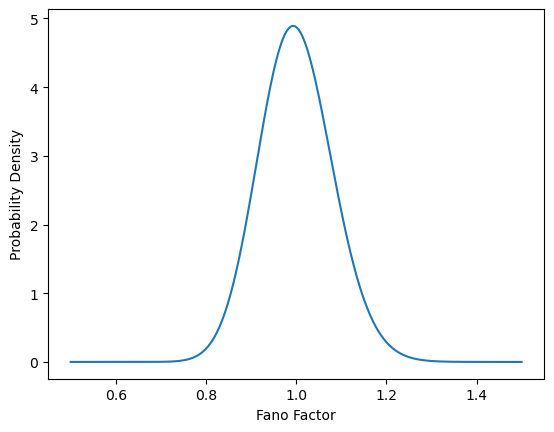

In [20]:
# plot the gamma distribution  with $N=400$ and investigate its shape (play a bit with the shape and scale parameters)

from scipy.stats import gamma   # Import the gamma object from the SciPy stats toolbox
N = 300                         # Determine number of time bins.
shape = (N - 1) / 2             # Define the shape parameter of the gamma function
scale = 2 / (N - 1)             # ... and the scale parameter
FF = np.linspace(.5, 1.5, 1000) # Define possible FF values
Y = gamma.pdf(FF, shape,
              scale=scale)      # ... compute gamma distribution,
plt.plot(FF,Y)                     # ... and plot it
plt.xlabel('Fano Factor')           # ... with axes labeled
plt.ylabel('Probability Density')
plt.show()


When  N is large, as it is here, the gamma distribution looks like a normal distribution (i.e., like a bell-shaped curve). We can use this distribution to construct an interval where we would expect the Fano factor to lie if the data were generated by a Poisson process. More specifically, if the data were generated by a Poisson process, then we would expect the Fano factor to lie in the 95% confidence interval around the value of 1. Read more about it [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).

In [ ]:
# construct the 95% confidence interval around the value of 1
# hint: use gamma.ppf()

**Question**: Consider the Fano factor for the high-light and low-light condition. Do you believe these data were generated by a Poisson process? Why, or why not? Use the gamma distribution to prove your points (hint: use the correct number of bins)


In [ ]:
#your code here

**Question**:  How do the results for the Fano factor change in each condition with different choices for the bin size of the increment process (e.g., 25 ms, 100 ms, 500 ms)? Note that by changing the bin size, you also change N. Challenge: See if you can write a function that takes the data and desired binwidth as input and returns the Fano factor and 95% confidence interval.

# Computing Autocorrelations for the Increments
----------------------------------------------


Another way to characterize the history dependence structure of a spike train is with the autocorrelation function of the increments. A correlation coefficient describes the degree of linear dependence between any two variables. The value of the correlation ranges from -1 to 1. A correlation value of -1 indicates a perfect linear relation between the two variables with a negative slope. A value of 0 indicates no linear relation between the two variables. And a value of 1 indicates a perfect linear relation between the two variables with a positive slope. Any other value indicates that one variable can be predicted using a linear function of the other, but that prediction will be imperfect; the closer the value is to ±1, the better the prediction will be. The sign of the coefficient indicates the slope of the linear relation.

Mathematically, the formula for the sample autocorrelation at a lag L is given by:

$$
\rho_{XX}(L) = \frac{\sum_{t=1}^{N-L} (x_t - \bar{x})(x_{t+L} - \bar{x})}{\sum_{t=1}^{N} (x_t - \bar{x})^2}
$$

where $x_t$ is the spike count at time $t$, $\bar{x}$ is the mean of the spike counts, and $N$ is the number of spike counts.

Let’s compute the autocorrelation for increment processes deduced from the spike train data. We compute the autocorrelation of the 50 ms increment process for lags ranging from 0 to 200 ms. We need only three lags to cover this range; lag 1 covers 50–100 ms, lag 2 covers 100–150 ms, and lag 3 covers 150–200 ms. We can define a function to compute the autocorrelation using the function `correlate()` from the NumPy module:


In [ ]:
# define a function to compute the autocorrelation
# hint: use np.correlate() function
# def autocorr(x, lags):
    # Compute the autocorrelation
    # Convert to correlation coefficients
    # Return only requested lags

# Compute the autocorrelation for the low and high light conditions

Our new function `autocorr()` takes two inputs. The first input is the data for which we want to compute the autocorrelation, in this case, the increment process for the low-light condition with 50 ms time bins. The second input is the number of lags to compute. The function returns the autocorrelation at each of the lags.

**Question**: Examine the numerical values returned by `autocorr()`. What do you find?



In [ ]:
# your code here

**Question (Bonus)**: How do we know whether these autocorrelation values are statistically significant?

If we are particularly interested in the fine-scale temporal dependence structure of the spikes, we would do better to compute the autocorrelation function for more finely binned intervals. To that end, let’s repeat the autocorrelation analysis for an increment process that uses 1 ms bins. We first compute a new increment process and then apply the `autocorr()` function to this process.

In [21]:
# Compute the autocorrelation for the low and high light conditions with 1 ms bins

In order to examie history dependence going back 100 ms, we need 100 lags (because each lag index corresponds to 1 ms). There are now too many values to examine them printed one by one on the screen, so instead we construct a plot of the autocorrelation function with lag on the 𝑥-axis and correlation on the 𝑦-axis.

In [22]:
# Plot the autocorrelation function for the low and high light conditions with 1 ms bins

Now that we’ve visualized the autocorrelations in the two light conditions, we can ask an important related question: Are the differences in the autocorrelations between these two conditions real?
 To answer this, we compute the difference in the autocorrelation functions between the low- and high-light conditions at every lag. If we assume that the firing in each condition is independent, the significance bounds for this difference can be computed by adding the variance of the autocorrelation from each condition.
 The standard deviation of the autocorrelation for the low-light condition is $1/\sqrt{N_1}$, so the variance of the auto- correlation for the low-light condition is $1/N_1$. For the high-light condition, the variance of the autocorrelation is $1/N_2$. We plot the differenced autocorrelations and the significance bounds.

In [23]:
# Compute the difference in the autocorrelation functions between the low and high light conditions
# plot the differenced autocorrelations and the significance bounds

# Computing Autocorrelations of the ISIs
----------------------------------------

The autocorrelation of the increments indicates the amount of time for which there are dependencies in the spiking data. In the high-light condition, we found large correlation values extending out to approximately 50 ms. This could be a consequence of the influence of patterns of many spikes with shorter ISIs or of single spikes with longer ISIs. We can distinguish between these possibilities by looking at the autocorrelation of the sequence of ISIs. In this case, the lag represents the number of spikes in the past rather than the amount of time in the past. If the dependence is only due to the last spike, we expect the ISIs to be uncorrelated at any nonzero lag. This would necessarily be true for data from a Poisson process. If we see correlation between ISIs, this suggests that the data do not come from a Poisson process and that the past spiking has an influence over multiple spikes.

To investigate this, let’s compute the autocorrelation of the sequence of ISIs for the low-light condition and the high-light condition.

In [24]:
# Compute the autocorrelation for the ISIs of the low and high light conditions

**Question**: . What do you find? Are these data consistent with a renewal process?

# Building a statistical model for the spike train
---------------------------------------------------

In the previous sections, we constructed autocorrelation functions of the increment processes and autocorrelation functions of the sequences of ISIs. The former suggested dependence going back up to ≈

50 ms (figure), while the latter suggested that the spiking at any time depends only on the timing of the most recent spike (figure). We now consider another powerful technique to understand these data: building a model. More specifically, we construct a statistical model of these data. This model captures important features of the data but does not consist of explicit biophysical components (an example of a biologically explicit model is the Hodgkin-Huxley equations [Hodgkin & Huxley, 1952]). The notion of a model can be confusing and is audience dependent, so we clarify here.

To construct a statistical model for these data we assume that the ISIs are independent samples from some unknown distribution. We typically posit some class of distributions from which the data might arise, and identify the one distribution in that class that maximizes the chance of observing the actual data.

What class of distributions should we use to build an ISI model? Previously, we discussed a Poisson process as a basic model for a spiking process, consistent with the conceptual idea of spikes as coin flips. Let’s fit a Poisson process with a constant firing rate to the observed data. In other words, we begin with a model where the number of spikes in any time bin is independent of all previous (and future) spiking and has a Poisson distribution with a fixed but unknown rate parameter $\lambda$. The probability P of $k$ spikes in any time bin is given by the Poisson distribution is given by:

$$
P(k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

where $k$ is the number of spikes in the time bin, and $k!$ is the factorial of $k$. Under this model, the distribution for the number of spikes in a bin is Poisson, but what is the distribution of the waiting time between spikes (i.e., what is the distribution of the ISIs)? It can be shown that for any Poisson process with constant firing rate the ISIs have an exponential distribution [Kass, Eden & Brown, 2014]. Mathematically, the probability density function for any ISI taking on a value $x$ is

$$
f(x) = \lambda e^{-\lambda x}
$$

where $\lambda$ is the rate parameter for the Poisson process.


**Alert!** This is a common point of confusion. The increments of a Poisson process have a Poisson distribution, and the ISIs have an exponential distribution. The Poisson distribution takes on non-negative integer values $\{0,1,…,\infty \}$, which make it appropriate for counting the number of spikes in an interval. The Poisson distribution does not make sense to describe the waiting time between spikes, since this typically takes on a continuous value in $[0, \infty]$.

Our goal is to find a good value of $\lambda$ so that our statistical model matches the observed ISI distributions. Let’s guess some values for $\lambda$, evaluate the model, and see how well the model matches the data. Let’s plot the probability of observing ISI values in 1 ms bins for the low-light condition. This is similar to the ISI histogram we plotted previously except that the 𝑦-axis should represent probability instead of counts.


In [ ]:
# Plot the ISI probability density function for the low light conditions
# on the same figure plot the f(x) of the exponential distribution, choosing lambda=5Hz.

**Question**: Try using some different values of $\lambda$. What values of appear to provide a good fit to the empirical distribution of ISI values? Do the same for the high-light condition.

## Likelihood function

the process of guessing values of $\lambda$ and comparing the model to the empirical ISI distribution is not satisfying. How do we identify the parameter $\lambda$ that best fits the observed ISI distribution? We now consider a procedure to do so. Our goal is to find the value of $\lambda$ that maximizes the likelihood of the data given the statistical model; this value of $\lambda$ will be the best fit of the model to the data. To implement this procedure, let’s consider the probability density of observing a sequence of ISIs, $x_1,x_2,\dots,x_n$. If we assume that the ISIs are independent, then the probability density is

$$
f(x_1,x_2,\dots,x_n) = f(x_1)f(x_2)\dots f(x_n) = \lambda e^{-\lambda x_1} \lambda e^{-\lambda x_2} \dots \lambda e^{-\lambda x_n}
$$

We call this expression the joint probability distribution of the observed data. In the first equality, we separate the joint probability distribution $𝑓(x_1,x_2,...,x_n)$ into a product of probability distributions of each event (i.e., the probability of the first ISI equaling $x_1$; multiplied by the probability of the second ISI equaling $x_2$; multiplied by the probability of the third ISI equaling $x_3$; and so on). This partitioning of the joint probability is valid here because we assume the ISIs are independent. In the second equality, we replace each probability distribution with the exponential distribution we expect for the ISIs of a Poisson process.
 Lastly, we rewrite the expression as a single exponential.

$$
f(x_1,x_2,\dots,x_n) = \lambda^n \exp(-\lambda \sum_{i=1}^n x_i)
$$
Notice that this last expression is a function of the unknown rate parameter, $\lambda$.

When considered as a function of the unknown parameters, the joint distribution of the data (8) is also called the likelihood. In this case, we write

$$L(\lambda) = \lambda^n \exp(-\lambda \sum_{i=1}^n x_i)$$


to indicate that the likelihood L is a function of $\lambda$.
Practically, one usually works with the log-likelihood, which is the natural logarithm of the likelihood function. The log-likelihood is a standard tool in statistics because it converts products into sums, which are easier to work with. The log-likelihood is given by

$$
\log L(\lambda) = n \log(\lambda) - \lambda \sum_{i=1}^n x_i
$$

In [ ]:
#plot the log likelihood function for the low light condition (use the ISIs)

You should see that the log likelihood is low for small $\lambda$, rises quickly as $\lambda$ increases, and then starts to fall off once $\lambda$ becomes larger than ~ 25. The point $\lambda$ = 25, where the log likelihood is maximized, is called the maximum likelihood estimate of $\lambda$. We use the symbol $\hat\lambda$ to denote the maximum likelihood estimate of $\lambda$.

**Question**: repeat the analysis for the high-light condition. What is the maximum likelihood estimate of $\lambda$ for the high-light condition? How does this value compare to the maximum likelihood estimate of $\lambda$ for the low-light condition?

**Question (Bonus)**: We could also have computed the maximum likelihood estimator theoretically, by differentiating the log likelihood with respect to $\lambda$, setting that equal to zero, and solving for $\lambda$. Try this approach and compare the result to the numerical optimization approach we used above.

**Question (Bonus)**: Use a bootstrap analysis to estimate the confidence interval around the maximum likelihood estimate of $\lambda$. Is the difference in the Poisson rate parameter between the low-and high-light conditions statistically significant?

## Evaluating the model

We’ve now fit a Poisson model to the data. But, does the Poisson model provide a good fit to the data? To answer this, let’s visualize the model fits compared to the data. There are a number of ways to do this. We start by comparing the expected proportion of ISIs for a Poisson process to the ISI histograms we actually observe in each condition. Let’s do so first for the low-light condition.

In [ ]:
# Plot the ISI probability density function for the low light conditions
# on the same figure plot the f(x) of the exponential distribution, with the lambda estimated from the data.

**Question**:  Compare the model fit to the empirical ISI distribution for the low-light condition. Does the model fit the data?

**Question**: Repeat the analysis for the high-light condition. Does the Poisson model provide a good fit to the data in this case?

In [ ]:
# your code here


To go beyond visual inspection of the model fits and quantify the goodness of fit, we compare the cumulative distributions computed from the data and model. The cumulative distribution function (CDF), $F(x)$, is the probability that a random variable will take on a value less than or equal to $x$. For the exponential ISI model with rate parameter $\lambda$, the model CDF is

$$
F(x)
= \int_0^x \lambda e^{-\lambda t} dt =
1 - e^{-\lambda x}
$$

We compare this to the empirical CDF of the data, $F_{emp}(x)$, which is defined as the proportion of observations less than or equal to $x$.

In [ ]:
# plot the empirical and model CDFs for the low light condition and then for the high light condition

**Question (Bonus)**: Another common way to visualize the difference between the model and empirical distributions is a Kolmogorov-Smirnov (KS) plot. This is just a plot of the empirical CDF against the model CDF directly. The KS plot is a powerful tool for visualizing differences between two distributions. Try plotting the KS plot for the low-light and high-light conditions. What do you find?

In [ ]:
# your code here

**Question (Bonus)** : We’ve now investigated one class of models, the exponential distribution, to fit the observed ISI distributions. However, through analysis, we’ve found that this statistical model is not sufficient to mimic the observed data. There are many other choices for statistical models; let’s try one other class of models. The inverse Gaussian probability model has already been used successfully to describe ISI structure in this system [Iyengar & Liao, 1997]). Try to build a model using this distribution.

# Summary
------------------

Write a summary of your findings explaining the differences (if any) between the low-light and high-light conditions. What can you infer about the neuron's activity in these two conditions? What are the limitations of the analysis you have performed? What further analyses could be done to improve the understanding of the neuron's activity?